In [17]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [18]:
import sys, pathlib

# Add the src/ folder to Python's search path
sys.path.append(str(pathlib.Path().resolve() / "src"))

from gas_tightness.mipi_client import fetch_series, latest_per_gas_day

In [86]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import sys, pathlib

# Make src/ importable
sys.path.append(str(pathlib.Path().resolve() / "src"))

from gas_tightness.mipi_client import fetch_series, latest_per_gas_day
from gas_tightness.features.build_dataset import fetch_multiple_series
from gas_tightness.features.tightness import add_simple_tightness_score

In [76]:
from gas_tightness.features.tightness import add_simple_tightness_score
#This was added later after tightness.py

In [78]:
scored = add_simple_tightness_score(daily_panel,
                                    col="forecast_39",
                                    window=10)
scored.tail()
#This was added later aswell so when you read back on this Euan, done get confused about the order.

,forecast_39,tightness_score,tightness_label
gas_day_start_utc,,,
2024-12-11 05:00:00+00:00,323.000000,1.753013,tight
2024-12-12 05:00:00+00:00,320.000000,1.300843,tight
2024-12-13 05:00:00+00:00,320.000000,1.083079,tight
2024-12-14 05:00:00+00:00,267.649994,-0.336176,neutral
2024-12-15 05:00:00+00:00,230.500000,-1.290227,long


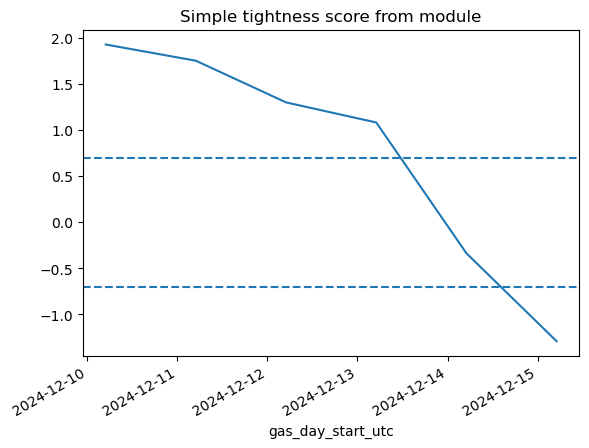

In [80]:
scored["tightness_score"].plot(title="Simple tightness score from module")
plt.axhline(0.7, linestyle="--")
plt.axhline(-0.7, linestyle="--")
plt.show()

In [74]:
scored = add_simple_tightness_score(daily_panel,
                                    col="forecast_39",
                                    window=10)
scored.tail()

,forecast_39,tightness_score,tightness_label
gas_day_start_utc,,,
2024-12-11 05:00:00+00:00,323.000000,1.753013,tight
2024-12-12 05:00:00+00:00,320.000000,1.300843,tight
2024-12-13 05:00:00+00:00,320.000000,1.083079,tight
2024-12-14 05:00:00+00:00,267.649994,-0.336176,neutral
2024-12-15 05:00:00+00:00,230.500000,-1.290227,long


In [19]:
df_test = fetch_series("PUBOB39", "2024-12-01", "2024-12-05")
df_test.head()

,Applicable At,Applicable For,Data Item,Value,Generated Time,Quality Indicator,gas_day_start_utc
0,2024-12-02 12:00:00,2024-12-05,"Demand Forecast, NTS, D-3",238,02/12/2024 15:30:09,NaN,2024-12-05 05:00:00+00:00
1,2024-12-01 12:00:00,2024-12-04,"Demand Forecast, NTS, D-3",270,01/12/2024 15:30:06,NaN,2024-12-04 05:00:00+00:00
2,2024-11-30 12:00:00,2024-12-03,"Demand Forecast, NTS, D-3",276,30/11/2024 15:30:08,NaN,2024-12-03 05:00:00+00:00
3,2024-11-29 12:00:00,2024-12-02,"Demand Forecast, NTS, D-3",252,29/11/2024 15:30:11,NaN,2024-12-02 05:00:00+00:00
4,2024-11-28 12:00:00,2024-12-01,"Demand Forecast, NTS, D-3",222,28/11/2024 15:30:11,NaN,2024-12-01 05:00:00+00:00


In [20]:
latest_per_gas_day(df_test)

,gas_day_start_utc,Value
4,2024-12-01 05:00:00+00:00,222
3,2024-12-02 05:00:00+00:00,252
2,2024-12-03 05:00:00+00:00,276
1,2024-12-04 05:00:00+00:00,270
0,2024-12-05 05:00:00+00:00,238


In [21]:
url = "https://data.nationalgas.com/api/find-gas-data-download"

params = {
    "ids": "PUBOB39",
    "dateFrom": "2024-12-01T00:00:00",
    "dateTo": "2024-12-10T23:59:59",
    "dateType": "GASDAY",
    "applicableFor": "Y",
    "latestFlag": "Y",
    "type": "CSV"
}

response = requests.get(url, params=params)
csv_text = response.text

csv_text[:500]


'Applicable At,Applicable For,Data Item,Value,Generated Time,Quality Indicator\n07/12/2024 12:00:00,10/12/2024,"Demand Forecast, NTS, D-3",312,07/12/2024 15:30:11,\n06/12/2024 12:00:00,09/12/2024,"Demand Forecast, NTS, D-3",290,06/12/2024 15:30:12,\n05/12/2024 12:00:00,08/12/2024,"Demand Forecast, NTS, D-3",240,05/12/2024 15:30:08,\n04/12/2024 12:00:00,07/12/2024,"Demand Forecast, NTS, D-3",244,04/12/2024 15:30:08,\n03/12/2024 12:00:00,06/12/2024,"Demand Forecast, NTS, D-3",245.5,03/12/2024 15:30:06,\n'

In [22]:
from io import StringIO

df = pd.read_csv(StringIO(csv_text))
df.head()

,Applicable At,Applicable For,Data Item,Value,Generated Time,Quality Indicator
0,07/12/2024 12:00:00,10/12/2024,"Demand Forecast, NTS, D-3",312.0,07/12/2024 15:30:11,NaN
1,06/12/2024 12:00:00,09/12/2024,"Demand Forecast, NTS, D-3",290.0,06/12/2024 15:30:12,NaN
2,05/12/2024 12:00:00,08/12/2024,"Demand Forecast, NTS, D-3",240.0,05/12/2024 15:30:08,NaN
3,04/12/2024 12:00:00,07/12/2024,"Demand Forecast, NTS, D-3",244.0,04/12/2024 15:30:08,NaN
4,03/12/2024 12:00:00,06/12/2024,"Demand Forecast, NTS, D-3",245.5,03/12/2024 15:30:06,NaN


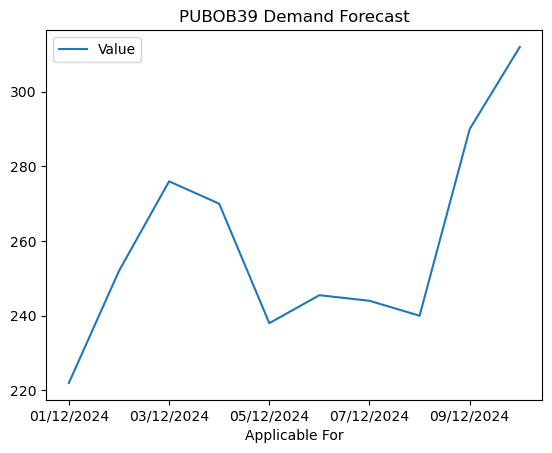

In [23]:
df = df.sort_values("Applicable For")

df.plot(
    x="Applicable For",
    y="Value",
    title="PUBOB39 Demand Forecast"
)

plt.show()

In [24]:
df_clean = df.copy()

df_clean["Applicable For"] = pd.to_datetime(df_clean["Applicable For"]).dt.date
df_clean["Applicable At"] = pd.to_datetime(df_clean["Applicable At"])

df_clean.head()

/var/folders/7_/nkcwmgt14659mbnth1j3tzrw0000gn/T/ipykernel_9700/2701944836.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clean["Applicable At"] = pd.to_datetime(df_clean["Applicable At"])


,Applicable At,Applicable For,Data Item,Value,Generated Time,Quality Indicator
9,2024-11-28 12:00:00,2024-01-12,"Demand Forecast, NTS, D-3",222.0,28/11/2024 15:30:11,NaN
8,2024-11-29 12:00:00,2024-02-12,"Demand Forecast, NTS, D-3",252.0,29/11/2024 15:30:11,NaN
7,2024-11-30 12:00:00,2024-03-12,"Demand Forecast, NTS, D-3",276.0,30/11/2024 15:30:08,NaN
6,2024-12-01 12:00:00,2024-04-12,"Demand Forecast, NTS, D-3",270.0,01/12/2024 15:30:06,NaN
5,2024-12-02 12:00:00,2024-05-12,"Demand Forecast, NTS, D-3",238.0,02/12/2024 15:30:09,NaN


In [25]:
from datetime import datetime, time
from zoneinfo import ZoneInfo

local = ZoneInfo("Europe/London")

def gas_day_start_utc(date_obj):
    dt_local = datetime.combine(date_obj, time(5, 0)).replace(tzinfo=local)
    return dt_local.astimezone(ZoneInfo("UTC"))

df_clean["gas_day_start_utc"] = df_clean["Applicable For"].apply(gas_day_start_utc)

df_clean.head()

,Applicable At,Applicable For,Data Item,Value,Generated Time,Quality Indicator,gas_day_start_utc
9,2024-11-28 12:00:00,2024-01-12,"Demand Forecast, NTS, D-3",222.0,28/11/2024 15:30:11,NaN,2024-01-12 05:00:00+00:00
8,2024-11-29 12:00:00,2024-02-12,"Demand Forecast, NTS, D-3",252.0,29/11/2024 15:30:11,NaN,2024-02-12 05:00:00+00:00
7,2024-11-30 12:00:00,2024-03-12,"Demand Forecast, NTS, D-3",276.0,30/11/2024 15:30:08,NaN,2024-03-12 05:00:00+00:00
6,2024-12-01 12:00:00,2024-04-12,"Demand Forecast, NTS, D-3",270.0,01/12/2024 15:30:06,NaN,2024-04-12 04:00:00+00:00
5,2024-12-02 12:00:00,2024-05-12,"Demand Forecast, NTS, D-3",238.0,02/12/2024 15:30:09,NaN,2024-05-12 04:00:00+00:00


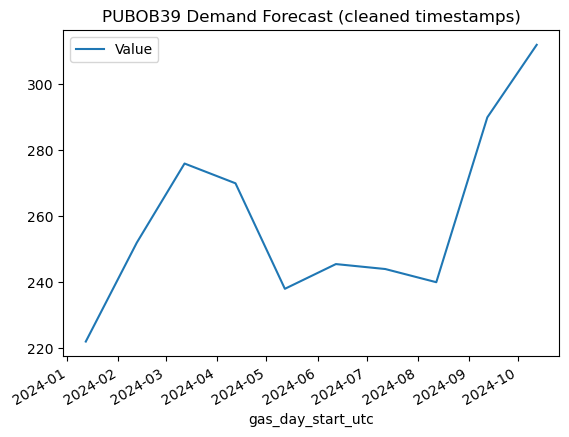

In [26]:
df_clean = df_clean.sort_values("gas_day_start_utc")

df_clean.plot(
    x="gas_day_start_utc",
    y="Value",
    title="PUBOB39 Demand Forecast (cleaned timestamps)"
)

plt.show()

In [27]:
from io import StringIO
from datetime import datetime, time
from zoneinfo import ZoneInfo

def fetch_series(series_code, start_date, end_date):
    """
    Fetch one National Gas data series for a date range.
    
    Returns a cleaned DataFrame with:
    - Applicable For (gas day)
    - Applicable At (timestamp)
    - value
    - gas_day_start_utc
    """
    
    url = "https://data.nationalgas.com/api/find-gas-data-download"
    
    params = {
        "ids": series_code,
        "dateFrom": f"{start_date}T00:00:00",
        "dateTo": f"{end_date}T23:59:59",
        "dateType": "GASDAY",
        "applicableFor": "Y",
        "latestFlag": "Y",
        "type": "CSV"
    }
    
    # 1. Download CSV
    resp = requests.get(url, params=params)
    csv_text = resp.text
    
    # 2. Convert CSV to DataFrame
    df = pd.read_csv(StringIO(csv_text))
    
    # 3. Clean timestamps
    df["Applicable For"] = pd.to_datetime(df["Applicable For"], dayfirst=True).dt.date
    df["Applicable At"] = pd.to_datetime(df["Applicable At"], dayfirst=True)

    
    # 4. Gas day start (05:00 UK local)
    local = ZoneInfo("Europe/London")
    def gas_day_start_utc(d):
        dt_local = datetime.combine(d, time(5, 0)).replace(tzinfo=local)
        return dt_local.astimezone(ZoneInfo("UTC"))
    
    df["gas_day_start_utc"] = df["Applicable For"].apply(gas_day_start_utc)
    
    return df

In [28]:
df2 = fetch_series(
    series_code="PUBOB39",
    start_date="2024-12-01",
    end_date="2024-12-10"
)

df2.head()

,Applicable At,Applicable For,Data Item,Value,Generated Time,Quality Indicator,gas_day_start_utc
0,2024-12-07 12:00:00,2024-12-10,"Demand Forecast, NTS, D-3",312.0,07/12/2024 15:30:11,NaN,2024-12-10 05:00:00+00:00
1,2024-12-06 12:00:00,2024-12-09,"Demand Forecast, NTS, D-3",290.0,06/12/2024 15:30:12,NaN,2024-12-09 05:00:00+00:00
2,2024-12-05 12:00:00,2024-12-08,"Demand Forecast, NTS, D-3",240.0,05/12/2024 15:30:08,NaN,2024-12-08 05:00:00+00:00
3,2024-12-04 12:00:00,2024-12-07,"Demand Forecast, NTS, D-3",244.0,04/12/2024 15:30:08,NaN,2024-12-07 05:00:00+00:00
4,2024-12-03 12:00:00,2024-12-06,"Demand Forecast, NTS, D-3",245.5,03/12/2024 15:30:06,NaN,2024-12-06 05:00:00+00:00


In [29]:
def latest_per_gas_day(df):
    """
    Take the cleaned DataFrame returned by fetch_series()
    and keep only the latest value for each gas day.
    """
    df_sorted = df.sort_values(["gas_day_start_utc", "Applicable At"])
    latest = df_sorted.groupby("gas_day_start_utc").tail(1)
    return latest[["gas_day_start_utc", "Value"]]

In [30]:
daily = latest_per_gas_day(df2)
daily

,gas_day_start_utc,Value
9,2024-12-01 05:00:00+00:00,222.0
8,2024-12-02 05:00:00+00:00,252.0
7,2024-12-03 05:00:00+00:00,276.0
6,2024-12-04 05:00:00+00:00,270.0
5,2024-12-05 05:00:00+00:00,238.0
4,2024-12-06 05:00:00+00:00,245.5
3,2024-12-07 05:00:00+00:00,244.0
2,2024-12-08 05:00:00+00:00,240.0
1,2024-12-09 05:00:00+00:00,290.0
0,2024-12-10 05:00:00+00:00,312.0


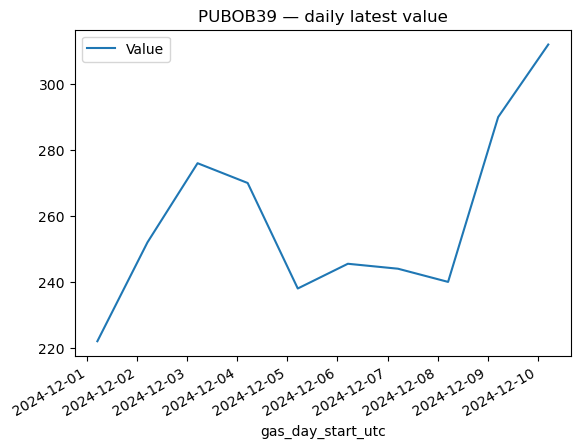

In [31]:
daily.plot(x="gas_day_start_utc", y="Value", title="PUBOB39 — daily latest value")
plt.show()

In [32]:
# Fetch a second series (PUBOB40) for the same date range
# This uses the same function we built earlier (fetch_series)
df3 = fetch_series(
    series_code="PUBOB40",       # another demand-related series
    start_date="2024-12-01",
    end_date="2024-12-10"
)

# Keep only one value per gas day
daily2 = latest_per_gas_day(df3)

daily2.head()

,gas_day_start_utc,Value
9,2024-12-01 05:00:00+00:00,9.46
8,2024-12-02 05:00:00+00:00,9.46
7,2024-12-03 05:00:00+00:00,9.46
6,2024-12-04 05:00:00+00:00,9.46
5,2024-12-05 05:00:00+00:00,9.46


In [33]:
# Rename the value columns so we know which series they belong to
daily = daily.rename(columns={"Value": "forecast_39"})
daily2 = daily2.rename(columns={"Value": "forecast_40"})

# Merge on the gas_day_start_utc timestamp
combined = daily.merge(daily2, on="gas_day_start_utc", how="outer")

combined

,gas_day_start_utc,forecast_39,forecast_40
0,2024-12-01 05:00:00+00:00,222.0,9.46
1,2024-12-02 05:00:00+00:00,252.0,9.46
2,2024-12-03 05:00:00+00:00,276.0,9.46
3,2024-12-04 05:00:00+00:00,270.0,9.46
4,2024-12-05 05:00:00+00:00,238.0,9.46
5,2024-12-06 05:00:00+00:00,245.5,9.46
6,2024-12-07 05:00:00+00:00,244.0,9.46
7,2024-12-08 05:00:00+00:00,240.0,9.46
8,2024-12-09 05:00:00+00:00,290.0,9.46
9,2024-12-10 05:00:00+00:00,312.0,9.46


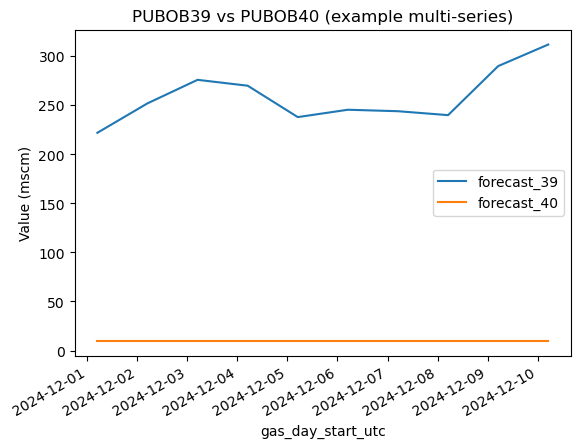

In [34]:
# Plot both series on the same chart
combined.set_index("gas_day_start_utc").plot(
    title="PUBOB39 vs PUBOB40 (example multi-series)"
)

plt.ylabel("Value (mscm)")
plt.show()

In [35]:
def fetch_multiple_series(series_codes, start_date, end_date):
    """
    Fetch several National Gas data series and combine them
    into one table with one row per gas day.

    Parameters
    ----------
    series_codes : dict
        A dictionary like {"forecast_39": "PUBOB39", "forecast_40": "PUBOB40"}
        where the key is the column name you want in the final dataset.

    Returns
    -------
    DataFrame with index = gas_day_start_utc
    and one column per requested series.
    """
    
    frames = []   # store each series as a small DataFrame
    
    for col_name, pub_id in series_codes.items():
        
        # fetch and clean the series
        df = fetch_series(pub_id, start_date, end_date)
        
        # extract one value per gas day
        daily = latest_per_gas_day(df)
        
        # rename "Value" to the column name we want
        daily = daily.rename(columns={"Value": col_name})
        
        frames.append(daily)
    
    # merge everything on gas_day_start_utc
    combined = frames[0]
    
    for other in frames[1:]:
        combined = combined.merge(other, on="gas_day_start_utc", how="outer")
    
    # sort by time
    combined = combined.sort_values("gas_day_start_utc")
    
    return combined

In [36]:
series_dict = {
    "forecast_39": "PUBOB39",
    "forecast_40": "PUBOB40"   # just for practice
}

combined2 = fetch_multiple_series(
    series_codes=series_dict,
    start_date="2024-12-01",
    end_date="2024-12-10"
)

combined2

,gas_day_start_utc,forecast_39,forecast_40
0,2024-12-01 05:00:00+00:00,222.0,9.46
1,2024-12-02 05:00:00+00:00,252.0,9.46
2,2024-12-03 05:00:00+00:00,276.0,9.46
3,2024-12-04 05:00:00+00:00,270.0,9.46
4,2024-12-05 05:00:00+00:00,238.0,9.46
5,2024-12-06 05:00:00+00:00,245.5,9.46
6,2024-12-07 05:00:00+00:00,244.0,9.46
7,2024-12-08 05:00:00+00:00,240.0,9.46
8,2024-12-09 05:00:00+00:00,290.0,9.46
9,2024-12-10 05:00:00+00:00,312.0,9.46


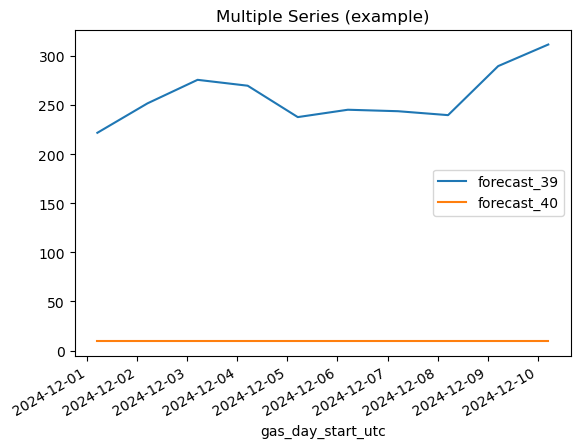

In [37]:
combined2.set_index("gas_day_start_utc").plot(
    title="Multiple Series (example)"
)
plt.show()

In [60]:
def fetch_multiple_series(series_codes, start_date, end_date):
    """
    Fetch several National Gas series and combine them into one table.

    Parameters
    ----------
    series_codes : dict
        Example: {"forecast_39": "PUBOB39"}
        keys   -> column names in the final table
        values -> publication IDs to pull from the API

    Returns
    -------
    DataFrame indexed by gas_day_start_utc
    with one column per series.
    """
    frames = []  # we will store one small DataFrame per series here

    for col_name, pub_id in series_codes.items():
        # 1) pull raw series using your module
        df = fetch_series(pub_id, start_date, end_date)

        # 2) reduce to one value per gas day
        daily = latest_per_gas_day(df)

        # 3) rename the Value column so we know which series it is
        daily = daily.rename(columns={"Value": col_name})

        frames.append(daily)

    # 4) merge all series on the gas_day_start_utc timestamp
    combined = frames[0]
    for other in frames[1:]:
        combined = combined.merge(other, on="gas_day_start_utc", how="outer")

    # 5) sort by time and set index
    combined = combined.sort_values("gas_day_start_utc")
    combined = combined.set_index("gas_day_start_utc")

    return combined

In [62]:
series_map = {
    "forecast_39": "PUBOB39",  # later we'll add linepack, actual demand, etc.
}

daily_panel = fetch_multiple_series(
    series_codes=series_map,
    start_date="2024-12-01",
    end_date="2024-12-15",
)

daily_panel

,forecast_39
gas_day_start_utc,
2024-12-01 05:00:00+00:00,222.000000
2024-12-02 05:00:00+00:00,252.000000
2024-12-03 05:00:00+00:00,276.000000
2024-12-04 05:00:00+00:00,270.000000
2024-12-05 05:00:00+00:00,238.000000
2024-12-06 05:00:00+00:00,245.500000
2024-12-07 05:00:00+00:00,244.000000
2024-12-08 05:00:00+00:00,240.000000
2024-12-09 05:00:00+00:00,290.000000


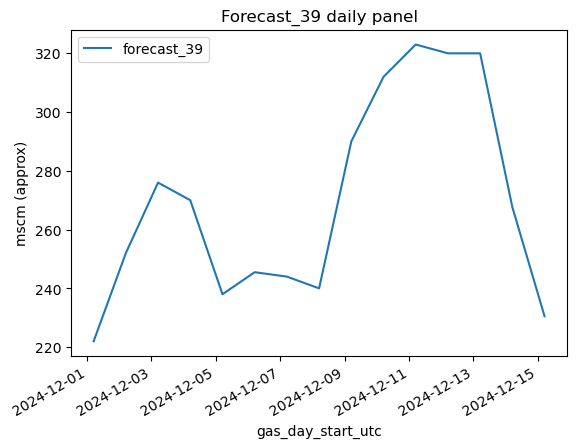

In [64]:
daily_panel.plot(title="Forecast_39 daily panel")
plt.ylabel("mscm (approx)")
plt.show()

In [66]:
import numpy as np

def add_simple_tightness_score(df, col="forecast_39", window=10):
    """
    Add a very simple tightness score based on one column.
    Here: z-score of the forecast vs its rolling mean.
    """
    out = df.copy()

    # rolling mean and std
    rolling = out[col].rolling(window=window, min_periods=window)
    mean = rolling.mean()
    std = rolling.std(ddof=1)

    # z-score: how many std dev above/below normal
    out["tightness_score"] = (out[col] - mean) / std

    # map z-score to labels
    def label(x):
        if np.isnan(x):
            return "unknown"
        if x >= 0.7:
            return "tight"
        if x <= -0.7:
            return "long"
        return "neutral"

    out["tightness_label"] = out["tightness_score"].apply(label)
    return out

In [68]:
scored = add_simple_tightness_score(daily_panel, col="forecast_39", window=10)
scored.tail()

,forecast_39,tightness_score,tightness_label
gas_day_start_utc,,,
2024-12-11 05:00:00+00:00,323.000000,1.753013,tight
2024-12-12 05:00:00+00:00,320.000000,1.300843,tight
2024-12-13 05:00:00+00:00,320.000000,1.083079,tight
2024-12-14 05:00:00+00:00,267.649994,-0.336176,neutral
2024-12-15 05:00:00+00:00,230.500000,-1.290227,long


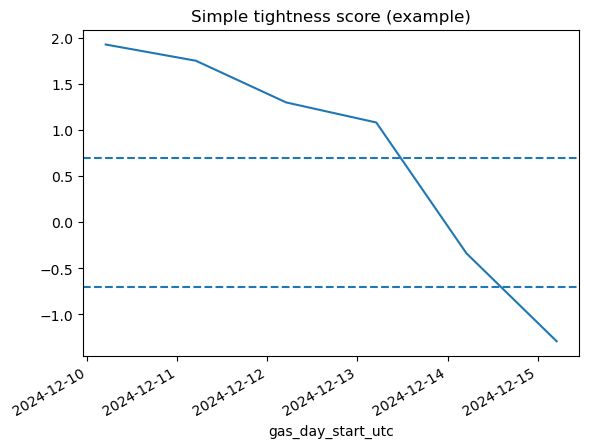

In [70]:
scored["tightness_score"].plot(title="Simple tightness score (example)")
plt.axhline(0.7, linestyle="--")
plt.axhline(-0.7, linestyle="--")
plt.show()

,forecast_39
gas_day_start_utc,
2024-12-16 05:00:00+00:00,245.0
2024-12-17 05:00:00+00:00,247.0
2024-12-18 05:00:00+00:00,234.0
2024-12-19 05:00:00+00:00,241.0
2024-12-20 05:00:00+00:00,250.0


,forecast_39,tightness_score,tightness_label
gas_day_start_utc,,,
2024-12-16 05:00:00+00:00,245.0,-0.904068,long
2024-12-17 05:00:00+00:00,247.0,-0.866001,long
2024-12-18 05:00:00+00:00,234.0,-1.173071,long
2024-12-19 05:00:00+00:00,241.0,-0.829168,long
2024-12-20 05:00:00+00:00,250.0,-0.468419,neutral


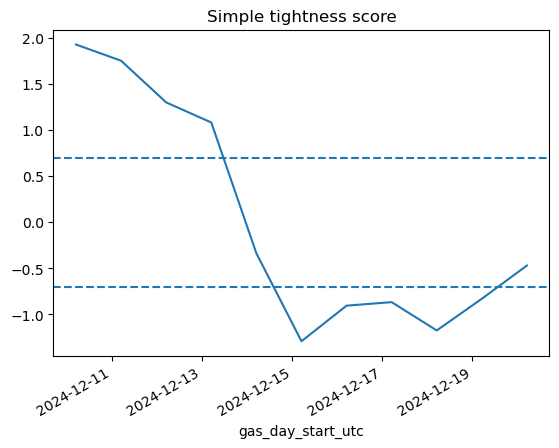

In [88]:
series_map = {"forecast_39": "PUBOB39"}

daily_panel = fetch_multiple_series(
    series_codes=series_map,
    start_date="2024-12-01",
    end_date="2024-12-20",
)

display(daily_panel.tail())

scored = add_simple_tightness_score(
    daily_panel,
    col="forecast_39",
    window=10,
)

display(scored.tail())

scored["tightness_score"].plot(title="Simple tightness score")
plt.axhline(0.7, linestyle="--")
plt.axhline(-0.7, linestyle="--")
plt.show()

In [90]:
import pathlib

processed_dir = pathlib.Path("data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)

out_path = processed_dir / "daily_panel_example.parquet"
scored.to_parquet(out_path)

out_path

PosixPath('data/processed/daily_panel_example.parquet')

In [92]:
last = scored.iloc[-1]

print("GB Gas — Simple Morning Note")
print("-----------------------------")
print(f"Date: {last.name.date()}")
print(f"Tightness score: {last['tightness_score']:.2f} ({last['tightness_label']})")
print(f"Forecast_39: {last['forecast_39']:.1f}")

if last['tightness_label'] == "tight":
    print("\nSystem unusually tight relative to recent trend.")
elif last['tightness_label'] == "long":
    print("\nSystem looser than normal — low stress signals.")
else:
    print("\nSystem conditions are normal.")

GB Gas — Simple Morning Note
-----------------------------
Date: 2024-12-20
Tightness score: -0.47 (neutral)
Forecast_39: 250.0

System conditions are normal.
